# Entanglement, Bell States, Quantum Teleportation, and Graph States

## Imports, Dependencies, and Devices

In [1]:
%%capture
!pip install pennylane

# For later use (you need to restart the session)
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


In [68]:
#dev1 = qml.device("default.qubit", wires=2, shots=10)

## Quantum Entanglement

In QM, the state of a system is described by its wavefunction. For entangled particles, their wavefunctions become linked, or entangled, so that the state of the whole system:

* Must be described as a single wavefunction.
* Or equivalently, this wavefunction cannot be separate into two indipendent wavefunctions

That's why separable states are said to be not entangled.

For a simple two-particle entangled state, the wavefunction of the system might be something like:

$$| \psi \rangle =\frac{| 0 \rangle_A \otimes |0\rangle_B + | 1 \rangle_A \otimes |1 \rangle_B}{\sqrt{2}} =\frac{| 0 0 \rangle + | 11 \rangle}{\sqrt{2}}$$

In this state, known as a Bell state, the first number in each pair represents the state of particle A, and the second number represents the state of particle B. The notation indicates that if particle A is found in state 0 (first number), particle B will definitely be in state 0 (second number), and vice versa. However, until a measurement is made, each particle does not have a definite state—they are in a superposition of states.

Entanglement has no remote influence (faster than light). No power to bring about a specific outcome at a distance; it can distribute only the knowledge of that outcome. In fact, if Alice in A measures state $| 0 \rangle_A$, then this means that if Bob in B performs a measurement, he will certainly obtain $| 0 \rangle_B$ (if the Bell State is the one above). Alice knows in advance the outcome of Bob, but to comunicate the information she must call Bob and this is bounded but the speed of light.

## Bell States

**Bell states** are the first example of entangling two particles one often encounters in quantum mechanics. There are four Bell states, and they represent maximally entangled states of two qubits.

🤔 **How can we create a Bell State?**

The idea is to take two qubits and, using a quantum circuit, put the first into a superposition with respect to the Pauli-Z gate, and then entangle the two qubits so that knowing the outcome of a measurement on one of the qubits forces the knowledge of the state of the second qubit. Depending on the basis state we prepare on the two qubits ($|00\rangle, |01\rangle, |10\rangle,$ or $|11\rangle$) we will get a different entangled state out of the circuit. These four states are often called **Bell states**. For instance, starting from $|00\rangle$ we obtain $\frac{| 0 0 \rangle + | 11 \rangle}{\sqrt{2}}$.


Sometimes, they are denoted by $\beta_{00}, \beta_{01}, \beta_{10},$ and $\beta_{11}$ in order to indicate the initial basis state from which they were obtained.


📔 Note: Bell States and EPR pairs in the context of quantum information and computation, are often used interchangeably to refer to pairs of maximally entangled qubits. Usually, Bell States refers two maximally entangled discrete two-qubits states, while EPR can be more general and refer to also continuous variables like position and momentum.


Let's first construct one of the Bell states which we will call $\beta_{00}$ as a way of indicating the initial basis state that we prepare $|00\rangle = |0\rangle \otimes |0\rangle$, for two qubits.

### State 1
$|00\rangle = |0\rangle \otimes |0\rangle = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix} = \begin{pmatrix} 1\\0\\0\\0 \end{pmatrix} \mapsto \mathbf{CNOT}(H|0\rangle \otimes I|0\rangle)$

Now, let's have a look at what $\mathbf{CNOT}(H|0\rangle \otimes I|0\rangle)$ is:

$ =\begin{pmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \left(\frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\\ 1 & -1 \end{pmatrix}\begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 1\\ 0 \end{pmatrix}\right)$

$ = \begin{pmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}\left( \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix} \right)$

$ = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 1\\0\\1\\0 \end{pmatrix}$

$ = \frac{1}{\sqrt{2}} \begin{pmatrix} 1\\0\\0\\1 \end{pmatrix}$

$ = \frac{|00\rangle + |11\rangle}{\sqrt{2}} = |\beta_{00}\rangle$

Now let's compute an expectation value using the Pauli-Z operator:

$\langle \beta_{00} | I \otimes Z | \beta_{00} \rangle = \begin{pmatrix}1, &0, &0, &1 \end{pmatrix} \begin{pmatrix} 1&0&0&0\\0&-1&0&0\\0&0&1&0\\0&0&0&-1 \end{pmatrix} \begin{pmatrix} 1\\0\\0\\1 \end{pmatrix} = 0$

The following quantum circuit computes this expectation value, as well as the expectation value $\langle \beta_{00} | Z \otimes I | \beta_{00} \rangle$, and outputs them in a numpy array $[0. \ 0.]$. This just means the average value measured should be $0$ on each wire. So, we should *expect* to measure $+1$ about 50% of the time, and $-1$ about 50% of the time.

In [3]:
shots=1
dev1 = qml.device("default.qubit", wires=2, shots=shots)

n = np.array([0, 0]) #initial states 0 and 0

@qml.qnode(dev1)
def circuit():
    qml.BasisState(n, wires=[0, 1])
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

print(circuit())

(array(-1.), array(-1.))


In [4]:
# Draw the circuit
drawer = qml.draw(circuit)
print(drawer())

0: ──H─╭●─┤  <Z>
1: ────╰X─┤  <Z>


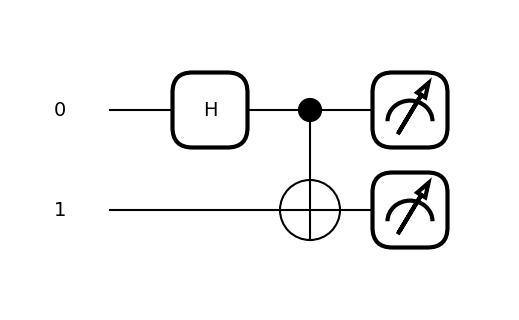

In [5]:
# Use matplotlib for drawing
qml.drawer.use_style('black_white')

fig, ax = qml.draw_mpl(circuit)()
plt.show()

Note: $0$ and $1$ on the left indicates the wires and not the qubits that are instead $|0⟩$ and $|0⟩$.

The next circuit measures the quantum circuit 10 times, which is specified by the number of shots parameter in the definition of the quantum device `dev1` being used. It outputs the measurements using the observables $Z \otimes I$ and $I \otimes Z$ in an array. We can see that the pair of measurement outcomes in all ten cases match, which is to be expected from the entanglement and the intitial state $|00\rangle$.

In [12]:
shots=100
dev1 = qml.device("default.qubit", wires=2, shots=shots)

n = np.array([0, 0]) #initial states 0 and 0

@qml.qnode(dev1)
def circuit():
    qml.BasisState(n, wires=[0, 1])
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliZ(0)),  qml.sample(qml.PauliZ(1))

print(circuit())

(array([ 1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,
        1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,
       -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
        1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,
        1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.]), array([ 1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,
        1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,
       -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
        1

### State 2
In the following circuit, we sample the same circuit, except we prepare the initial state to be $|01\rangle$.

In [7]:
n = np.array([0, 1]) #initial states 0 and 1

@qml.qnode(dev1)
def circuit():
    qml.BasisState(n, wires=[0, 1])
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

print(circuit())

(array([-1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.]), array([ 1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.]))


In [8]:
# Draw the circuit
drawer = qml.draw(circuit)
print(drawer())

0: ──H─╭●─┤  Sample[Z]
1: ──X─╰X─┤  Sample[Z]


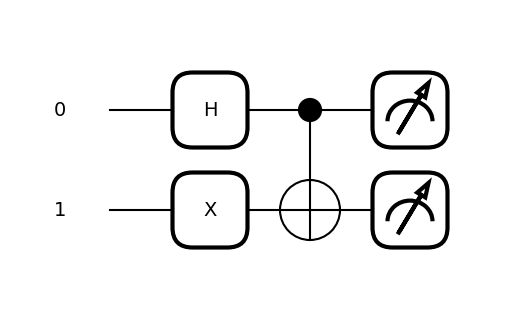

In [9]:
# Use matplotlib for drawing
qml.drawer.use_style('black_white')

fig, ax = qml.draw_mpl(circuit)()
plt.show()

### Exercize 2.1
As an exercise, draw the circuit diagram and write out the linear algebra involved in this computation.

### Exercise 2.2
Now compose a circuit that measures the expectation values of $\langle \beta_{01}| Z \otimes I | \beta_{01} \rangle$ and $\langle \beta_{01}|I \otimes Z|\beta_{01}\rangle$ for the intitial state $|01\rangle$ which gives the output state $|\beta_{01}\rangle$ that you computed in the previous exercise.

### State 3
In the following circuit, we sample the same circuit, except we prepare the initial state to be $|10\rangle$.

In [10]:
n = np.array([1, 0]) #initial states 1 and 0

@qml.qnode(dev1)
def circuit():
    qml.BasisState(n, wires=[0, 1])
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

print(circuit())

(array([-1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.]), array([-1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.]))


### Exercize 3.1
As an exercise, draw the circuit diagram and write out the linear algebra involved in this computation.

### Exercise 3.2
Now compose a circuit that measures the expectation values of $\langle \beta_{10}| Z \otimes I | \beta_{10} \rangle$ and $\langle \beta_{10}|I \otimes Z|\beta_{10}\rangle$ for the intitial state $|10\rangle$ which gives the output state $|\beta_{10}\rangle$ that you computed in the previous exercise.

### State 4
In the following circuit, we sample the same circuit, except we prepare the initial state to be $|11\rangle$.

In [11]:
n = np.array([1, 1]) #initial states 1 and 1

@qml.qnode(dev1)
def circuit():
    qml.BasisState(n, wires=[0, 1])
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

print(circuit())

(array([-1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.]), array([ 1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.]))


### Exercize 4.1
As an exercise, draw the circuit diagram and write out the linear algebra involved in this computation.

### Exercise 4.2
Now compose a circuit that measures the expectation values of $\langle \beta_{11}| Z \otimes I | \beta_{11} \rangle$ and $\langle \beta_{11}|I \otimes Z|\beta_{11}\rangle$ for the intitial state $|11\rangle$ which gives the output state $|\beta_{11}\rangle$ that you computed in the previous exercise.

## More on Entanglement and Bell Sates

In the previous exercises we have computed the four Bell states

\begin{align}
|\beta_{00}\rangle &= \frac{|00\rangle +|11\rangle}{\sqrt{2}}\\
|\beta_{01}\rangle &= \frac{|01\rangle +|10\rangle}{\sqrt{2}}\\
|\beta_{10}\rangle &= \frac{|00\rangle -|11\rangle}{\sqrt{2}}\\
|\beta_{11}\rangle &= \frac{|01\rangle -|10\rangle}{\sqrt{2}}
\end{align}

which resulted from preparing the initial basis states $|00\rangle, |01\rangle, |10\rangle,$ and $|11\rangle$, and then running each one through the same quantum circuit defined by the operations

\begin{align}
\mathbf{CNOT}(H|i_1\rangle \otimes I|i_2\rangle)
\end{align}

where $i_1$ and $i_2$ are each either "$0$" or "$1$". These are sometimes called "*EPR-states*" due to the fact that they were studied by Einstein, Podolsky, and Rosen in their study of *entanglement*.

* The Hadamard gate puts the first qubit into a superposition
* The $\mathbf{CNOT}$-gate forces the second qubits value to be determined by the measurement value of the first qubit.

So, for example, once the first qubit is put into a superposition, it has a probability of $1/2$ that it will be measures in the $|0\rangle$ state, and a probability of $1/2$ of being measure in the $|1\rangle$ state. Once the $\mathbf{CNOT}$-gate is applied, we get a vector  

\begin{align}
|\beta_{00}\rangle &= \frac{|00\rangle +|11\rangle}{\sqrt{2}} = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle
\end{align}

which has a probability of $|1/\sqrt{2}|^2 = 1/2$ of being measured in the $|00\rangle$ state, and a probability of $|1/\sqrt{2}|^2 = 1/2$ of being measured in the $|11\rangle$ state. So, if the first qubit is measure, and collapses into the $|0\rangle$ state, then we know the second qubit must also be in the $|0\rangle$ state as well since the only possible measurement outcome with the first qubit in the $|0\rangle$ state is the state $|00\rangle = |0\rangle \otimes |0\rangle$. If, on the other hand, we measure the first qubit in the $|1\rangle$ state, we know the overall state must be $|11\rangle$ and therefore the second qubit must also be in the $|1\rangle$ state.

Suppose we prepared the initial basis state $|01\rangle = |0\rangle \otimes |1\rangle$. Then we will get the output

\begin{align}
|\beta_{01}\rangle = \frac{|01\rangle +|10\rangle}{\sqrt{2}} = \frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|10\rangle
\end{align}

This has a probability of $|1/\sqrt{2}|^2 = 1/2$ of being in the $|01\rangle$ state, and the same $1/2$ probability of being in the $|10\rangle$ state when measured. So, we know if we only measure the first qubit, the state of the second qubit is determined since it is entangled with the first. In particular, meauring $|0\rangle$ for the first qubit meanse the second *must* be in the state $|1\rangle$. Measuring $|1\rangle$ for the first qubit state forces the second qubit to be in the $|0\rangle$ state. The interesting and importand point to make here is, **we need not measure the second qubit in order to know its state. We need only measure the first qubit**. This of course all works if we only measure the second qubit as well. They determine each other, and knowing the state of one means we *automatically* know the state of the other. This is probably one of the most basic and well known examples of entanglement.

## Quantum Teleportation

👉**Problem**: Suppose we have some unknown initial state on a single qubit $|\psi \rangle = \alpha |0\rangle +\beta |1\rangle$ that we wish to teleport to someone far away.


In quantum teleportation, we typically start with three qubits:

* The qubit to be teleported (qubit 1, $|\psi \rangle$ in the picture)
* An entangled qubit (qubit 2, part of an entangled pair shared between two parties)
* The other entangled qubit (qubit 3, held by the receiver)

The first step usually involves performing a Bell measurement on qubits 1 and 2. This measurement results in two classical bits of information that are sent to the receiver, who then performs certain operations on qubit 3 based on these bits to reconstruct the original state of qubit 1.


![teleportation.png](https://drive.google.com/uc?id=1CfuX2QLT3KeL6Zg_OyZHAXjJzS0R9nU4)



The circuit above takes the the initial basis state $|\psi \rangle \otimes |00\rangle$ and applying the Hadamard gate and the $\mathbf{CNOT}$ gate to the lower qubits we get a state of $|\psi\rangle \otimes |\beta_{00}\rangle$. You can recognize the first part of the lower two wires as the circuit that was used in preparing the Bell states. The double lines in the circuit that come after the meters indicate classical information (binary bits of either a zero or one).

You can think that Alice owns the first state $|\psi \rangle$, Bob the third state $|0 \rangle$, while the second qubit will be in an entanglement state shared by Alice and Bob. It is thorough this entagled state that Alice will be able to send to Bob the information of the $|\psi \rangle$ state.

In the circuit diagram for quantum teleportation, $M_1$ and $M_2$ are meant to indicate the outcome of a measurement. $X^{M_2}$ is then equal to either $X^0$ or $X^1$, and similarly $Z^{M_1}$ must be either $Z^0$ or $Z^1$, depending on the outcome $M_1$. The above circuit can be seen as preparing the state

\begin{align}
|\psi_0 \rangle &= |\psi \rangle \otimes |\beta_{00} \rangle = (\alpha |0 \rangle + \beta |1⟩ )\otimes |\beta_{00} \rangle \\
&= \frac{1}{\sqrt{2}}\big(\alpha|0\rangle \otimes (|00\rangle +|11\rangle)+\beta|1\rangle \otimes (|00\rangle +|11\rangle) \big).
\end{align}



Passing through the $\mathbf{CNOT}$ gate on the first and second wire then gives

\begin{align}
|\psi_1\rangle &= \frac{1}{\sqrt{2}}\big(\alpha|0\rangle \otimes (|00\rangle + |11\rangle)+\beta|1\rangle(|10\rangle +|01\rangle) \big).
\end{align}

Applying the Hadamard gate to the first wire then gives us

\begin{align}
|\psi_2\rangle &= \frac{1}{2}\big(\alpha(|0\rangle +|1\rangle)\otimes (|00\rangle + |11\rangle) +\beta(|0\rangle-|1\rangle)\otimes (|10\rangle +|01\rangle) \big) \\
&= \frac{1}{2}\big(|00\rangle \otimes (\alpha|0\rangle + \beta|1\rangle)+ |01\rangle \otimes (\alpha|1\rangle + \beta|0\rangle)+|10\rangle \otimes (\alpha|0\rangle - \beta|1\rangle) + |11\rangle \otimes (\alpha|1\rangle - \beta|0\rangle) \big).
\end{align}

Now, performing the measurement on the first two qubits (think that Alice is performing this measure) we can get the following four outcomes:

\begin{align}
00 \mapsto |\psi_3(00) \rangle &= \alpha|0\rangle +\beta|1\rangle \\
01 \mapsto |\psi_3(01) \rangle &= \alpha|1\rangle +\beta|0\rangle \\
10 \mapsto |\psi_3(10) \rangle &= \alpha|0\rangle -\beta|1\rangle \\
11 \mapsto |\psi_3(11) \rangle &= \alpha|1\rangle -\beta|0\rangle
\end{align}


Check this references:
* https://brilliant.org/wiki/quantum-teleportation/
* https://www.ryanlarose.com/uploads/1/1/5/8/115879647/quic02.pdf

In [13]:
# Define a device with 3 qubits
dev2 = qml.device("default.qubit", wires=3, shots=10)

# Define angles for the RX, RY, and RZ operators
x = np.pi/3
y = np.pi/4
z = np.pi/6

@qml.qnode(dev2)
def circuit():
    # Use RX, RY, and RZ to prepare some state |psi>
    qml.RX(x, wires=0)
    qml.RY(y, wires=0)
    qml.RZ(z, wires=0)

    # Run the circuit
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

print(circuit())

(array([-1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.]), array([ 1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.]))


So, depending on the output of the above circuit:

* on the first qubit, if we measured $+1$, then we measure spin-up, i.e. $M_1 = 0$ (meaning $|0⟩$) and if we measured $-1$, then we have spin-down, i.e. $M_1 = 1$ (meaning $|1⟩$).
* Likewise, for $+1$ measured on the second wire, we have $M_2 = 0$ (meaning $|0⟩$) on the second wire, and if $-1$ was measured on the second wire, then we have $M_2 = 1$ (meaning $|1⟩$).

This tells us what operators to apply to the third wire. In particular, we apply

\begin{align}
Z^{M_1}X^{M_2}
\end{align}

to the third wire, and in so doing, we retrieve the arbitrary initial state $|\psi \rangle$ that we prepared on the first wire as output on the third wire.

For instance, if Alice after measuring first and second qubits finds $(0,0)$ then Bob should use the operator $I$ (so Bob qubit is exactly |ψ⟩). If Alice measures $(0,1)$, Bob should use $X$. If Alice measures $(1,0)$, Bob should use $Z$, while if the ourcome is $(1,1)$ he should use $ZX$.

Since we must know the measurement outcomes $M_1$ and $M_2$ to *teleport* the arbitrary state $|\psi \rangle$, this prevents any faster than light communication using quantum teleportation. In particular, if we communicate the measurement outcomes to someone who shares one particle of an EPR pair with us, this is equivalent to one qubit worth of information being comminucated. However, we must transmit the classical information $M_1$ and $M_2$ to perform the teleportation. This concept of using entanglement of pairs of particles (or more complicated ensembles of particles) to perform teleportation has deep connections with developing quantum circuits that are resistant to noise and in **quantum error correcting codes**.

There is a principle in quantum computing called the **Principle of Deferred Measurement**. This allows us to move intermediate measurements in a circuit to the end of a circuit by using conditional quantum operations. Thie means that measurements commute with controls.

**Super Simple Explanation of the Principle of Deferred Measurement**

Imagine you have a magical storybook with two different kinds of stories: "Quantum Stories" and "Regular Stories."

*Regular Stories:*
When you read a Regular Story, it's like following a recipe. First, you do Step 1 (like mixing flour and sugar), then Step 2 (like adding eggs), and so on. You have to do each step one by one, in order. If the recipe says you need to check if the cake is ready (like a measurement in a quantum circuit), you do it exactly when the recipe says. You can't wait until the end of the recipe to check if the cake is done; it has to be done at that exact step.

*Quantum Stories:*
Now, the Quantum Stories are more magical. In these stories, you can be a bit tricky. Let's say the story asks you to do something special (like a measurement in a quantum circuit), but doing it right away might be hard or make the story less fun.

In a Quantum Story, you can say, "I'll wait a bit before I do this special thing." You keep reading and do some other parts of the story first. The magical part is, waiting doesn't change how the story ends! You can do the special thing (the measurement) later, and the story will end the same way as if you did it earlier.

The Magic of Deferred Measurement:
This waiting to do the special thing (measurement) until later is what scientists call the "Principle of Deferred Measurement." It means that in a quantum computer (or our Quantum Story), you can delay these measurements to the end of your process, and it won't change the final result. This makes planning and building quantum circuits easier and sometimes even more powerful, just like how waiting to check the cake at the end of the recipe might make baking simpler.

So, the Principle of Deferred Measurement is like a magical rule in Quantum Stories that lets you be a bit flexible about when to do certain things, making the story (or quantum computing) easier and still just as magical!



So, we may take the following circuit:

![deferred_measurement_1.png](https://drive.google.com/uc?id=1J_QVvTd08mlbN9tLyLc6Jb-__JxkOqNO)



and we can turn it into a **"controlled-U"** gate. *Controlled-U* gates for any arbitrary $2 \times 2$ unitary gate

\begin{align}
U = \begin{pmatrix}
u_{11} & u_{12} \\
u_{21} & u_{22}
\end{pmatrix}
\end{align}

can be written in the following block matrix form:

\begin{align}
\begin{pmatrix}
I & 0 \\
0 & U
\end{pmatrix} =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{11} & u_{12} \\
0 & 0 & u_{21} & u_{22}
\end{pmatrix}.
\end{align}

The corresponding circuit diagram is:

![deferred_measurement_1.png](https://drive.google.com/uc?id=1HPK_8KzA_juVjPLs-4OpxNrpUnhMS53r)



So, for example, the usual *contolled-not* gate, or **CNOT** gate is

\begin{align}
\begin{pmatrix}
I & 0 \\
0 & X
\end{pmatrix} =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}.
\end{align}

Similarly, a *controlled-Z* gate would be

\begin{align}
\begin{pmatrix}
I & 0 \\
0 & Z
\end{pmatrix} =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}.
\end{align}

So, we can move the measurements performed above in the teleportation circuit to the end of the circuit as follows:

![deferred_measurement_2.png](https://drive.google.com/uc?id=1Yu0fUxdQDQlOkyS-qKy8-YPmao9bkwmA)


This can be reduced to the following somewhat simpler circuit involving the Bell state $\beta_{00}$:


![deferred_measurement_1.png](https://drive.google.com/uc?id=1L6Et8GlXNvY6Lw52hbXbz2Sg74YsGhcp)


As a circuit in PennyLane we can write the following and compute the entire circuit without having to introduce any intermediate measurements and classical information:

In [14]:
# Define a device with 3 qubits
dev2 = qml.device("default.qubit", wires=3, shots=10)

# Define angles for the RX, RY, and RZ operators
x = np.pi/3
y = np.pi/4
z = np.pi/6

@qml.qnode(dev2)
def circuit():
    # Use RX, RY, and RZ to prepare some state |psi>
    qml.RX(x, wires=0)
    qml.RY(y, wires=0)
    qml.RZ(z, wires=0)

    # Run the circuit
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[1,2])
    qml.CZ(wires = [0,2])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

print(circuit())

(array([ 1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.]), array([-1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.]))


### Exercises

1. Write out the matrix form of a "**controlled-Y**" gate.

2. Write out the matrix form of a "**controlled-phase**" gate where the **phase gate** is:
\begin{align}
S = \begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
\end{align}

3. Write out the matrix form of a "**controlled-T**" gate where the $T$-gate is:
\begin{align}
T = \begin{pmatrix}
1 & 0 \\
0 & e^{i \pi/4}
\end{pmatrix}
\end{align}

4. Use Python code to compute the state given by applying the controlled-Y gate to the basis state $|01\rangle$. For example, you may want to define the basis states:

In [ ]:
d = np.matrix([[1],
               [0]])

u = np.matrix([[0],
               [1]])

Then you can compute the basis state $|00\rangle, |01\rangle, |10\rangle, |11\rangle$ as tensor products of these two basis states. For example, the basis state $|00\rangle$ would then be:

In [ ]:
dd = np.kron(d,d)
print(dd)

[[1]
 [0]
 [0]
 [0]]


You should also define the controlled-Y gate:

In [ ]:
CY = np.matrix([[1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 0, -1j],
                [0, 0, 1j, 0]])
print(CY)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.-1.j]
 [ 0.+0.j  0.+0.j  0.+1.j  0.+0.j]]


5. Use Python code to compute the state given by applying the controlled-Y gate to the basis state $|11\rangle$.

6. Use Python code to compute the state given by applying the controlled-S (or controlled phase) gate to the basis state $|00\rangle$.

7. Use Python code to compute the state given by applying the controlled-S (or controlled phase) gate to the basis state $|10\rangle$.

8. Use Python code to compute the state given by applying the controlled-T gate to the basis state $|00\rangle$.

9. Use Python code to compute the state given by applying the controlled-T gate to the basis state $|11\rangle$.

## Quantum Teleportation Using Qiskit

### Dependencies and Imports

In [12]:
from qiskit import *
from qiskit_aer import AerSimulator

In this section we want to use IBM Qiskit to built a teleportation cirucit. First, we define a quantum circuit with three qubits and three classical bits of information.

In [4]:
circuit = QuantumCircuit(3, 3)

Next, we can plot the ciruit diagram we just defined.

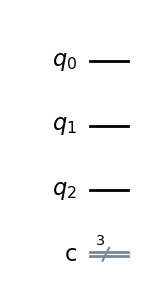

In [5]:
%matplotlib inline
circuit.draw(output='mpl')

Now, let's apply a NOT  X-gate to qubit 0, followed by a "barrier", which is a way to visually break up the circuit diagram.

The barrier acts as a directive for circuit compilation to separate pieces of a circuit so that any optimizations or re-writes are constrained to only act between barriers (and if there are no barriers they act on the whole circuit). This only comes into play when using the transpile or execute functions in Qiskit (execute includes a transpile step).

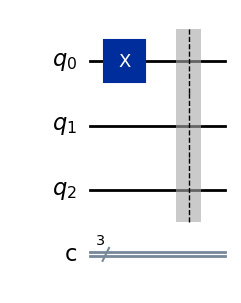

In [6]:
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

Now, we will apply a Hadamard gate to qubit 1, a CNOT gate from qubit 1 to qubit 2, and redraw the new circuit.

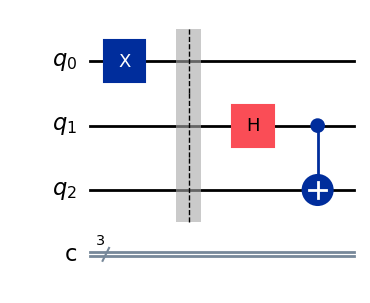

In [7]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

Next, let's apply a CNOT gate from qubit 0 to qubit 1, and a Hadamard gate to qubit 0, and again redraw the circuit.

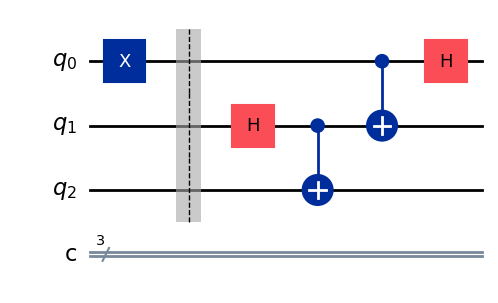

In [8]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

We now create a barrier, then measure qubits 0 and 1, and put the measurement data into the classical bits 0 and 1, and redraw the circuit once more.

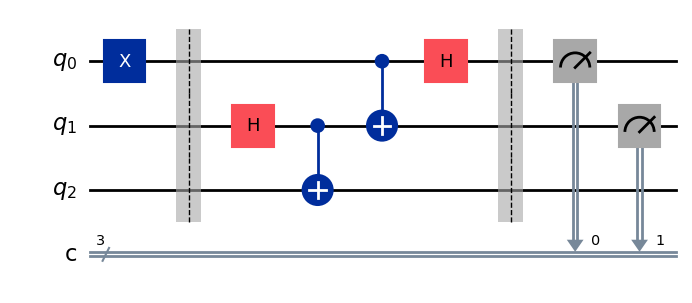

In [9]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

Apply another barrier. Next, apply a CNOT from qubit 1 to qubit 2, and a controlled-Z gate from qubit zero to qubit 2 and redraw the circuit.

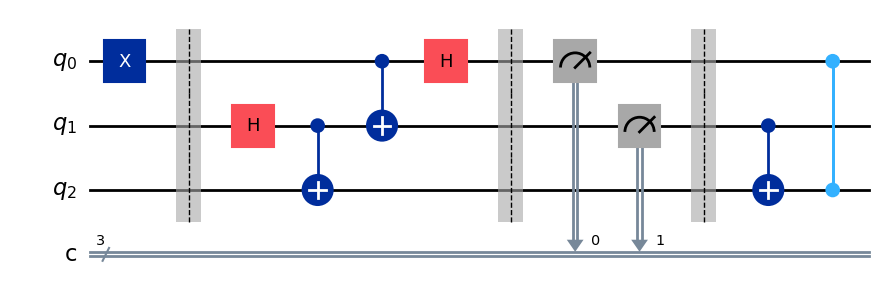

In [10]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

Here, we measure qubits 0 and 1 and define a simulator to run the circuit on. We run the circuit 1024 shots and we plot the histogram of results.

In [13]:
circuit.measure(2,2)

# Run on Aer simulator
simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()  # Run 1024 shots

# Get counts (how many times each outcome appeared)
counts = result.get_counts()
print(counts)


{'111': 261, '100': 267, '101': 236, '110': 260}


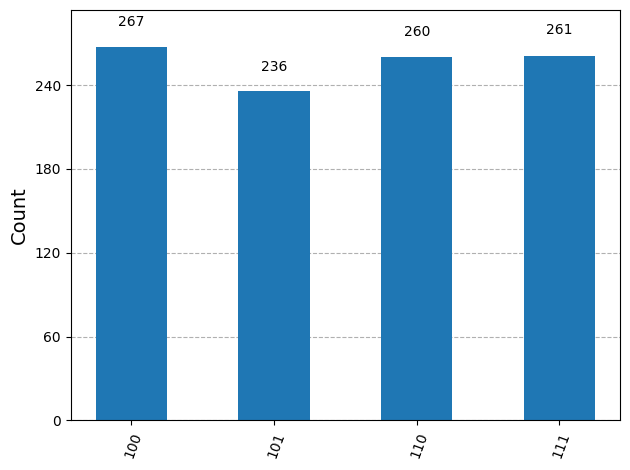

In [14]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Multipartite Entanglement

For a quantum circuit with $n \geq 3$ qubits, we can have states called **multi-partite entanglement states**. These are states with three or more qubits (or subsystems) which are not fully entangled, and not fully separable either. In the Bell states, we only have two qubits, which are entangled. In the following examples we will look at some concrete examples of three and four qubit systems which exhibit more complicated behavior. We will also discuss larger systems of qubits which generalize these three and four qubit systems.

We call a system of $n$ qubits **fully separable** if the state vector can be written in the form

\begin{align}
|\psi\rangle = |\psi_0\rangle \otimes |\psi_1\rangle \otimes \cdots \otimes |\psi_{n-1}\rangle.
\end{align}

If it cannot be written in this form it may have **multipartite entanglement**. Multipartite entanglement can be best described using the panguage of partitions of sets. Suppose we have an index set $I = \{0, 1, 2, ..., n-1\}$ on $n$-qubits. We can partition this index set in many ways. For example, If our index set is $I = \{0, 1, 2\}$ we can partition it into two subsets in three ways:

\begin{align}
\{0,1\} &\cup \{2\},\\
\{0, 2\} &\cup \{1\},\\
\{0\} &\cup \{1, 2\}.
\end{align}

Similarly, we can separate $I = \{0, 1, 2, 3\}$ can be separated into two (disjoint) subsets in the following ways,  

\begin{align}
\{0, 1, 2 \} &\cup \{3\}, \\
\{0, 1, 3 \} &\cup \{2\}, \\
\{0, 2, 3 \} &\cup \{1\}, \\
\{1, 2, 3 \} &\cup \{0\}, \\
\{0, 1 \} &\cup \{2, 3 \}, \\
\{0, 2 \} &\cup \{1, 3 \}, \\
\{0, 3 \} &\cup \{1, 2 \}, \\
\end{align}

Computing the number of partitions of a set of size $n$, into $k$ subsets can be done using **Stirling numbers of the second kind**. We won't go into the combinatorics of partitions, but the formula is,

\begin{align}
\left\lbrace  
\begin{matrix}
n \\ k
\end{matrix}
\right\rbrace =
\frac{1}{k!} \sum_{i=0}^k(-1)^{i} {k\choose i} (k-i)^n
\end{align}

These are related to **Bell numbers** which cound the total number of ways to partition as set of $n$ objects. Now, suppose we have a partition of $n$ qubits into $k$ subsets, which corresponds to a partition of the index set $I$ of the qubits. Write the partition of $I$ as $\mathcal{P}(I) = \{I_1, I_2, ..., I_k\}$. Say we have a state vector of amplitudes $|\psi\rangle$ for this $n$-qubit system. Then $|\psi\rangle$ is separable with respect to $\mathcal{P}(I)$ if and only if it can be written as,

\begin{align}
|\psi\rangle = \sum_{j = 1}^N p_j |\psi^j_1\rangle \otimes \cdots |\psi^j_{k}\rangle.
\end{align}

Let's look at an example for the case of $I = \{0,1,2\}$ and $I_1 = \{0,1\}, I_2 = \{2\}$. Then we should be able to write the state vector as

\begin{align}
|\psi\rangle = \sum_{j=1}^N|\psi_{0,1}^j\rangle \otimes |\psi_2^j\rangle.
\end{align}

Similarly, if our index set for the four qubit system $I = \{0,1,2,3\}$ is divided into $I_1 = \{0,2\}$ and $I_2 = \{1,3\}$ then a state vector $|\psi\rangle$ is separable with respect to this partition of $I$ if it can be written

\begin{align}
|\psi\rangle = \sum_{j=1}^N |\psi_{0,2}^j\rangle \otimes |\psi_{1,3}^j\rangle.
\end{align}

### W States

A $W$-state is a three qubit entangled state of the following form:

\begin{align}
|W\rangle = \frac{1}{\sqrt{3}}\left(|001\rangle + |010\rangle + |100\rangle \right).
\end{align}

As a first step in understanding the properties of the $W$-state, let's try creating this state using a quantum circuit in QISKit. First, we should import a few things.

In [15]:
from qiskit import *
from qiskit.quantum_info import Operator, Statevector
# Import Aer
from qiskit_aer import AerSimulator


Now, we will need to define a unitary gate that is not already predefined in QISKit. QISKit, as we have seen, already has a standard set of gates such as the Pauli gates, the Hadamard gates, the CNOT-gate, and several others. Each one takes one or more qubits as an argument to specifify which qubits it should operate on, and some of the gates take other agruments such as angles for rotations. We need to define a new gate that will operate on a single qubit in a three qubit system. To do this, we will first need to define an `Operator`in QISKit, which is $2 \times 2$ since it only operates on a single qubit.

In [16]:
MG = Operator([[np.sqrt(1/3), -np.sqrt(2/3)],
               [np.sqrt(2/3), np.sqrt(1/3)]])

Next, let's define a three qubit, and three classical bit `QuantumCircuit` in QISKit.

In [17]:
qc = QuantumCircuit(3)

Now, we will define our unitary gate. It takes three arguments, `MG` the `Operator` we defined above, along with an array specifying which qubit(s) to operate on, and a `label`.

In [18]:
qc.unitary(MG, [0], label='G')

Let's draw our circuit so far. We should see the unitary gate we have defined applied to the first qubit.

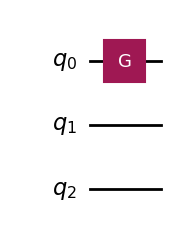

In [19]:
qc.draw(output='mpl')

Next, we apply a controlled-Hadamard gate to the first and second qubit with the first qubit as the control qubit and the second qubit as the target qubit.

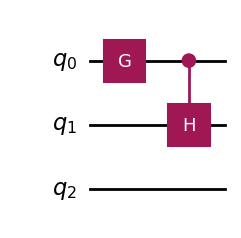

In [20]:
qc.ch(0,1)
qc.draw(output='mpl')

Finally, we apply a **CCX**-gate with the target on the third qubit.

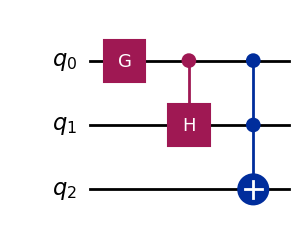

In [21]:
qc.ccx(0,1,2)
qc.draw(output='mpl')

Let's define one last custom unitary gate. It is a permutation matrix meant to permute the amplitudes of the curcuit. The permutation can be written in cycle notation as,

\begin{align}
\sigma = (1,2,3)(4)(5,8)(6)(7).
\end{align}

In [22]:
permute = Operator([[0, 0, 1, 0, 0, 0, 0, 0],
                    [1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 1, 0, 0, 0]])

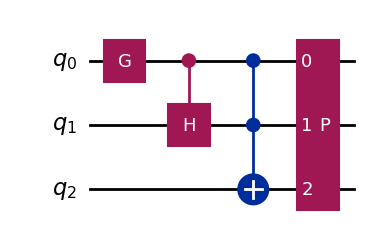

In [23]:
qc.unitary(permute, [0,1,2], label='P')
qc.draw(output='mpl')

Now, we would like to run this circuit. To do this, we use `Aer` and define a backend (device). We create a job, store the result, then we use the state vector simulator to print out the resulting state vector given by our circuit.

In [24]:
# Get statevector directly
W_state = Statevector(qc)
print(W_state)

Statevector([0.        +0.j, 0.57735027+0.j, 0.57735027+0.j,
             0.        +0.j, 0.57735027+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


The state vector (approximated to three decimal places above) is,

\begin{align}
|W\rangle =
\begin{pmatrix}
0\\
1/\sqrt{3}\\
1/\sqrt{3}\\
0 \\
1/\sqrt{3}\\
0 \\
0 \\
0 \\
\end{pmatrix} =
\frac{1}{\sqrt{3}}\left(|001\rangle + |010\rangle + |100\rangle \right).
\end{align}

If we would like to verify this by measuring the circuit to see which states we get out after say, $2048$ shots we can add measurments to the circuit.

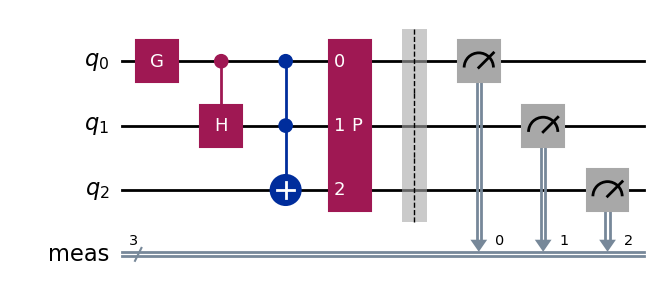

In [25]:
qc.measure_all() #measure all qubits
qc.draw(output='mpl')

Now, let's use `AerSimulator` (default `qasm_simulator`) with $2048$ shots. Since our circuit (qc) contains a controlled-Hadamard (ch) gate, which is not natively supported by the `AerSimulator`'s default basis gates, we must transpiled the `AerSimulator` into its native basis gates (['cx', 'id', 'rz', 'sx', 'x']). So, simply add transpile() before running.

We will plot the histogram showing the outcome of all of these measurments.



{'001': 677, '100': 659, '010': 712}


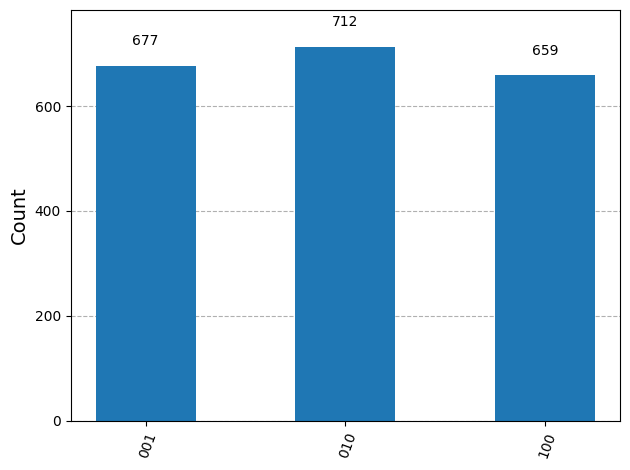

In [26]:
# Run on the QASM simulator (updated backend)
simulator = AerSimulator()  # Default is 'qasm_simulator'
transpiled_qc = transpile(qc, simulator)  # Converts CH to basis gates

# Run the transpiled circuit
result = simulator.run(transpiled_qc, shots=2048).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

As we can see, we measure the three states $|001\rangle, |010\rangle,$ and $|100\rangle$, each $1/3 = (1/\sqrt{3})^2$ of the time. Since this was run on a simulator the results are perfect. We don't need to run this on an actual quantum computer since there are only three qubits, but we certainly could by simply defining a different backend device.

💡The interesting thing to notice about the three-qubit $W$-state is that measurement of only a single qubit leaves us with an entangled pair of qubits that is not destroyed by measurment. This is not the case with the next states we discuss, the **GHZ states**. This means $W$-states are in some sense more robust against noise and measurement because loss of a single qubit does not completely destroy the entanglement. This can be used to encode logical qubits into three physical qubits for error correction protocols. $W$-states can be generalized to more than three qubits as follows:

\begin{align}
|W_n\rangle = \frac{1}{\sqrt{n}}(|00\cdots 01\rangle + |00\cdots 10\rangle + \cdots + |01\cdots 00\rangle +|10\cdots 00\rangle).
\end{align}

This is a "*one-hot encoding*" and in general is not simple to construct using circuits. The reason for this is, many quantum computers are restricted in what gates they can implement directly. All other gates, such as the custom gates that we constructed for the three-qubit state $|W_3\rangle$. Remember, we construct a custom unitary gate

\begin{align}
G(1/3) =
\begin{pmatrix}
1/\sqrt{3} & -2/\sqrt{3} \\
2/\sqrt{3} & 1/\sqrt{3}
\end{pmatrix}
\end{align}

along with the amplitude permutation gate,

\begin{align}
\sigma =
\begin{pmatrix}
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0
\end{pmatrix}.
\end{align}

These two gates are not standard gates and must be approximated by other gates that are standard. The set of standard gates available depends on the hardware backend, and different quantum computers will approximate other gates to varying efficiencies. There is a famous result known as the **Solovay-Kitaev Theorem** and related approximation theorems that state that with an appropriate set of gates, any other gate can be *efficiently* approximated. We will not go into the details of the exact notion of efficiency here. Using standard gates, we can construct a $W_n$-state, but some of the algorithms get a little complicated for large $n$ which are not powers of $2$. Before moving on to GHZ-states, let's have a look at the state $|W_4\rangle$ for a four-qubit system.

First, create a `QuantumCircuit` with four qubits.

In [27]:
qc2 = QuantumCircuit(4)

Now, we add the necessary gates to prepare the state $|W_4 \rangle$, and then draw the circuit diagram.

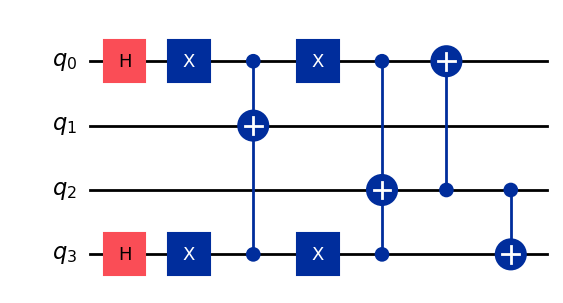

In [28]:
qc2.h(0)
qc2.h(3)
qc2.x(0)
qc2.x(3)
qc2.ccx(0,3,1)
qc2.x(0)
qc2.x(3)
qc2.ccx(0,3,2)
qc2.cx(2,0)
qc2.cx(2,3)
qc2.draw(output='mpl')

Let's add measurements to our circuit.

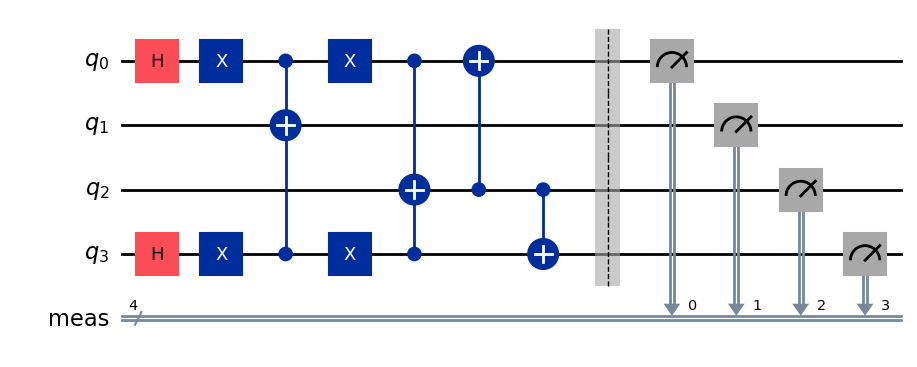

In [29]:
qc2.measure_all()
qc2.draw(output='mpl')

Finally, let's add a backend device and run the circuit $2048$ times and plot the histogram.

{'1000': 535, '0100': 490, '0010': 500, '0001': 523}


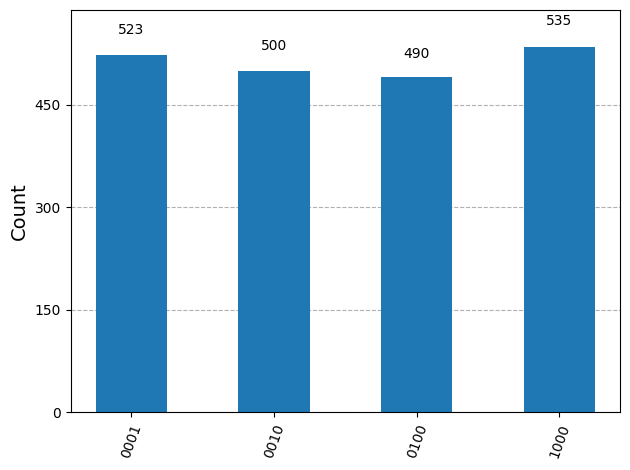

In [30]:
# Run on the QASM simulator (updated backend)
simulator = AerSimulator()  # Default is 'qasm_simulator'
#transpiled_qc = transpile(qc, simulator)  # Converts CH to basis gates

# Run the transpiled circuit
result = simulator.run(qc2, shots=2048).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

As we would expect from the state

\begin{align}
|W_4\rangle = \frac{1}{4}(|0001\rangle + |0010\rangle + |0100\rangle + |1000\rangle),
\end{align}

we measure each of the above four states approximately $1/4$ of the time.

### GHZ States

**Greenberger–Horne–Zeilinger states (GHZ states)** are much simpler to construct than the $W$-states from the previous section. For any $n \geq 3$ the general GHZ-state has the form,

\begin{align}
|GHZ\rangle = \frac{|0\rangle^{\otimes n}+|1\rangle^{\otimes n}}{\sqrt{2}}.
\end{align}

So, the three-qubit GHZ-state is,

\begin{align}
|GHZ_3\rangle = \frac{|000\rangle + |111\rangle}{\sqrt{2}}.
\end{align}

We can construct this state in QISKit as follows. First, let's define a `QuantumCircuit` with three qubits.

In [31]:
circuit = QuantumCircuit(3)

The gates we need to apply are as follows.

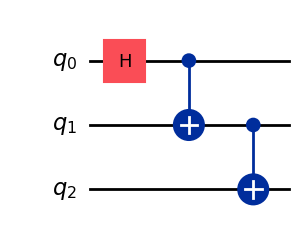

In [32]:
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.draw(output='mpl')

Let's use the state vector simulator to output the state vector.

In [33]:
# Get statevector directly
GHZ_state = Statevector(circuit)
print(GHZ_state)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


As expected the ouptut amplitude vector is,

\begin{align}
\begin{pmatrix}
1/\sqrt{2}\\
0\\
0\\
0\\
0\\
0\\
0\\
1/\sqrt{2}
\end{pmatrix} =
\frac{|000\rangle + |111\rangle}{\sqrt{2}}.
\end{align}

So, if we measure the circuit and plot the histogram, we should expect to see $|000\rangle$ about $1/2$ of the time, and $|111\rangle$ about $1/2$ of the time.

### Exercises

1. Compute the amplitude (state) vector for the $W$-state $|W_5\rangle$.
2. Add measurements to the GHZ-state circuit for three qubits.
3. Define a backend and run the GHZ-state circuit define above for three qubits.
4. Plot the histogram you get from running the three-qubit GHZ-state circuit with measurements.
5. Define a backend and print out the state vector.
6. Add measurements to the circuit (on all qubits).

## Example: Entanglement Entropy of GHZ with Qiskit

### Creating a GHZ-state

The following code creates a quantum circuit that prepares a GHZ-state, and prints the state vector as a column (ket) vector.

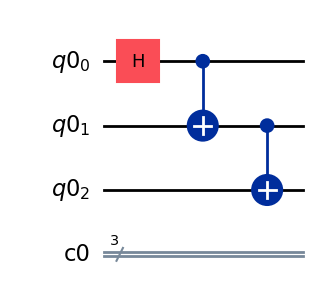

In [34]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
GHZ = QuantumCircuit(qr, cr)

GHZ.h(0)
GHZ.cx(0,1)
GHZ.cx(1,2)
GHZ.draw(output='mpl')

Next, we can use `Statevector()` function from Qiskti to print the state vector as well. This will be useful for computing the von Neumann entropy of the corresponding density matrix using the function `entropy()` in Qiskit.

In [46]:
from qiskit.quantum_info import Statevector
psi = Statevector(GHZ)
print(psi)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


Next, we use the `DensityMatrix()` function from Qiskit by passing it the `GHZ_state` ket-vector we defined above.

In [47]:
from qiskit.quantum_info import DensityMatrix
D = DensityMatrix(GHZ_state)
print(D)

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0.5+0.j]],
              dims=(2, 2, 2))


Now we can compute the entropy using the Qiskit `entropy()` function. We can pass it either the `Statevector` or the `DensityMatrix`. In the second case, we get effectively zero entropy, in the first we get exactly zero. This makes sense because the state is a pure state and the density matrix is computed as $D = |\psi\rangle \langle \psi|$.

In [48]:
from qiskit.quantum_info import entropy


vn_entropy1 = entropy(psi, base=2)
vn_entropy2 = entropy(D, base=2)

print(vn_entropy1, vn_entropy2)

0 1.4415419267167124e-15


Finally, let's generate a random density matrix $\rho$ using the Qiskit function `random_density_matrix()`. This function's first argument is the dimension of the desired density matrix, which need not be a power of two. However, in the context of quantum circuits with qubits, it is important we make this restriction manually. There are of course more general systems involving things such as "*qudits*" which might yield arbitrary dimensional density matrices.

In [49]:
from qiskit.quantum_info import random_density_matrix
rho = random_density_matrix(8, rank=None, method='Hilbert-Schmidt', seed=None)
print(rho)

DensityMatrix([[ 0.13462437-1.60855407e-18j, -0.00984264+1.18715445e-03j,
                -0.04344729+5.01119466e-02j, -0.05125165+5.23500219e-02j,
                -0.01072066+1.09724440e-02j,  0.02308749-2.81422280e-02j,
                -0.00966611-2.08679102e-02j,  0.02769035+1.07318651e-02j],
               [-0.00984264-1.18715445e-03j,  0.08024968+2.19533794e-19j,
                 0.02643204+4.41325212e-03j, -0.02189254-2.43330517e-02j,
                -0.00374591-3.72596418e-02j, -0.01843006-1.58413513e-02j,
                 0.00051813+2.11305812e-02j,  0.007872  -1.54670005e-02j],
               [-0.04344729-5.01119466e-02j,  0.02643204-4.41325212e-03j,
                 0.14556467+3.26506608e-19j,  0.04202839+2.20487844e-02j,
                 0.02648224+2.50672106e-02j, -0.08066016+2.04737912e-02j,
                -0.03648447-1.51917480e-02j,  0.0304417 -6.44378422e-02j],
               [-0.05125165-5.23500219e-02j, -0.02189254+2.43330517e-02j,
                 0.04202839-2.20487

We can compute the entropy using the Qiskit `entropy()` function.

In [50]:
entropy(rho, base=2)

np.float64(2.3001262363489774)

Let's plot the entropy of the system that evolved from the state given by the density matrix $D$ of the GHZ-state to the system described by the density matrix $\rho$.

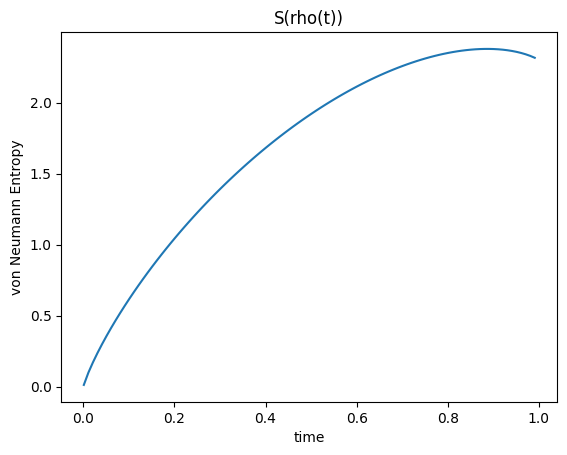

In [62]:
time = np.arange(0.001, 1., 0.01)
p = np.arange(0.001, 1., 0.01)


vn_entropy = list()
for t in time:
    vn_entropy.append(entropy(D, base=2)*t + entropy(rho, base=2)*(1-t))

# Create list of von Neumann entropies
vn_y = list()
for value in p:
    value = float(value)
    #print(isinstance(value, Number))
    M = value*rho + (1-value)*(D)
    #M = 2*D
    vn_y.append(entropy(M))


# Create list of von Neumann entropies
vn_y = list()
for value in p:
    value = float(value)
    M = value*rho + (1.0-value)*D
    vn_y.append(entropy(M))

# convert list of matrices to list of numbers for plotting
# y = list()
# for value in vn_y:
#    y.append(value.tolist()[0][0])


# plot p vs. S(rho_p)
plt.xlabel('time')
plt.ylabel('von Neumann Entropy')
plt.title('S(rho(t))')
plt.plot(p, vn_y, color='tab:blue')
plt.show()

### Exercises:

1. Construct a circuit that prepares the Bell state $|\psi\rangle = \beta_{00} = (|00\rangle + |11\rangle)/\sqrt{2}$
2. Use the `Statevector_Simulator` backend in Qiskit to get the state vector and print it as a column vector.
3. Compute the density matrix $\rho = |\psi\rangle \langle \psi|$ using the `np.dot()` function from NumPy.
4. Use the function `von_neumann_entropy()` to compute the von Neumann entropy of $\rho$.
5. Use the function `vn_eig_entropy()` to compute the von Neumann entropy of $\rho$.
6. Use the Qiskit function `Statevector()` as the argument of the Qiskit function `entropy()` to compute the von Neumann entropy of $\rho$.
7. Use the Qiskit function `DensityMatrix()` as the argument of the Qiskit function `entropy()` to compute the von Neumann entropy of $\rho$.
8. Verify that you get zero (or effectively zero) for all methods of computing the von Neumann entropy of $\rho$.
9. For extra practice, repeat steps (1)-(8) for the Bell states $\beta_{01}, \beta_{10},$ and $\beta_{11}$.
10. Try ploting the entropy as the the state evolves from $\beta_{00}$ to $\beta_{01}$. You should get zero entropy at either end of your graph, and a nonzero value for all mixed states in between.

## An Experiment with GHZ-states

We can write the GHZ-state on three qubits in a slightly different way as,

\begin{align}
|GHZ_3\rangle = (|00\rangle + |11\rangle)\otimes |+\rangle + (|00\rangle - |11\rangle) \otimes |-\rangle
\end{align}

If we now measure the third qubit (and only the third qubit) in the $X$-basis rather than in the $Z$-basis, we see that the third qubit is in a superposition with respect to the $X$-basis and so we should measure $|+\rangle$ about $1/2$ the time and $|-\rangle$ about $1/2$ the time. This will leave the remainging two qubits in the state $|00\rangle + |11\rangle$ or $|00\rangle - |11\rangle$ respectively. If we get the second outcome, we can apply a $Z$-gate to get the state $|00\rangle + |11\rangle$. This should be recognizable as a maximally entangled Bell state. This also exhibits the multipartite entanglement of the GHZ state with respect to the partition

\begin{align}
I = \{0,1\} \cup \{2\},
\end{align}

since it can be written in the form

\begin{align}
|\psi_{0,1}^1\rangle \otimes |\psi_2^1\rangle + |\psi_{0,1}^2\rangle \otimes |\psi_2^2\rangle
\end{align}

where

\begin{align}
|\psi_{0,1}^1\rangle \otimes |\psi_2^1\rangle &= (|00\rangle\rangle + |11\rangle)\otimes |+\rangle \\
|\psi_{0,1}^1\rangle \otimes |\psi_2^1\rangle &= (|00\rangle\rangle - |11\rangle) \otimes |-\rangle.
\end{align}

Let's define a new circuit that prepares the GHZ-state on three qubits.  

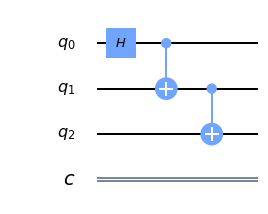

In [ ]:
ghz = QuantumCircuit(3,1)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(1,2)
ghz.draw(output='mpl')

Now, let's define a function that measure in the $X$-basis. If you remember from the first two chapters on linear algebra and quantum gates, we have the equality $X = HZH$, where $H$ is the Hadamard gate. So, we can create a function that measure in the $X$-basis by conjugating by the Hadamard gate.

In [ ]:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

Let's apply this function to our GHZ circuit and draw the new circuit.

In [ ]:
x_measurement(ghz, 2, 0)

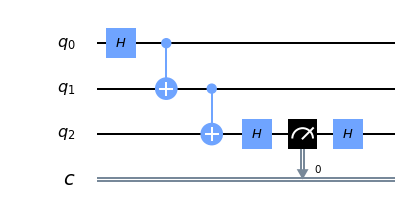

In [ ]:
ghz.draw(output='mpl')

Now, let's define a state vector simulator backend and plot the Bloch multi-vector states. You will notice, the first two qubits do not have any output, since they are in a maxiamlly entangled Bell state. The third qubit will always output either the $|+\rangle$ state or the $|-\rangle$ state. If you run this circuit multiple times, you will always get one of these two outputs on the third qubit.

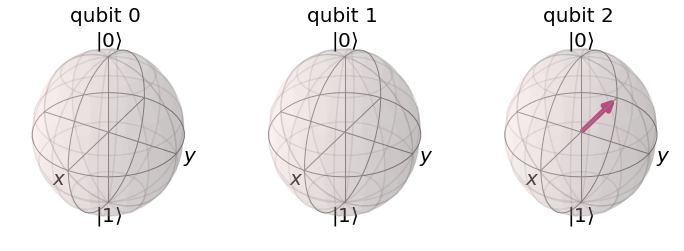

In [ ]:
from qiskit.visualization import plot_bloch_multivector
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')
# Do the simulation, returning the state vector
out_state = execute(ghz,backend).result().get_statevector()
# Display the output state vector
plot_bloch_multivector(out_state)

Let's define another backend device and run the circuit $2048$ times and plot the histogram that tells us what we measure on the third qubit.

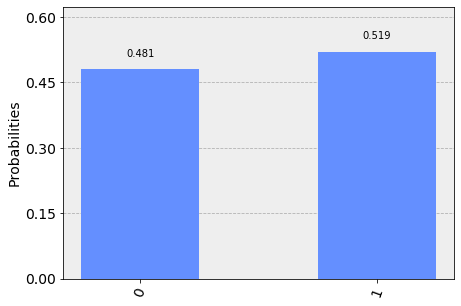

In [ ]:
ghz_backend = Aer.get_backend('qasm_simulator')
ghz_shots = 2048
ghz_results = execute(ghz, backend=ghz_backend, shots=ghz_shots).result()
ghz_answer = ghz_results.get_counts()

plot_histogram(ghz_answer)

### Exercises

1. Write a circuit with three qubits and one classical bit.
2. Add the gates necessary to prepare the GHZ-state on three qubits.
3. Create a function to measure the third qubit in the $Y$-basis and apply it to your circuit.
4. Run the circuit on the `statevector_simulator` backend and plot the Bloch multi-vector. You should always get either $|l\rangle$ or $|r\rangle$ on the third qubit.
5. Run the circuit on the `qasm_simulator` backend and plot the histogram for $1024$ shots.

## Graph States

There are more complicated multipartite entangled states known as **graph states**. Graph states are specified by a graph $G$ with vertices $V$ representing qubits, and edges $E$ connecting them. A graph state is often denote by $|G\rangle$. In order to construct $∣G\rangle$ using a quantum circuit, one prepares the initial state on all qubits to be $∣+\rangle^{\otimes}$. Recall, the state

\begin{align}
|+⟩=\frac{(|0\rangle+|1\rangle)}{\sqrt{2}},
\end{align}

can be prepared using Hadamard gates on the initial qubit state $|0\rangle$. Next, for the graph $G = (V,E)$ we apply the controlled-$Z$ gate

\begin{align}
|0\rangle \langle 0∣ \otimes I + ∣1\rangle \langle 1∣ \otimes Z =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}
\end{align}

to every pair of qubits that are connected by an edge $e \in E$ of the graph $G$. The order in which we apply these controlled-$Z$ gates is arbitrary since they all commute with one another. A graph state can be represented as

\begin{align}
|G\rangle = \left(\bigotimes_{e \in E}U_e\right)|+\rangle^{\otimes |V|}
\end{align}

where $e = \{x, y\} \in E$ is an edge connecting vertex $x$ and vertex $y$. $U_e$ is a controlled-$Z$ gate with control qubit corresponding to $x$ and target qubit corresponding to $y$. The number of qubits is $|V|$, the size of the vertex set.

We can also define a graph state as a stabilizer code using the following operators,

\begin{align}
S_v = X_v \otimes \left(\bigotimes_{u \in Adj(v)} Z_{u}\right)
\end{align}

where $X_v$ is the Pauli-$X$ gate on the qubit corresponding to the vertex $v \in V$; $Adj(v)$ denotes the set of all vertices adjacent to $v$; $Z_{u}$ is the Pauli-$Z$ gate applied to the qubit corresponding to the vertex $u \in V$. The **graph state** is then the $+1$-eigenvalue eigenstate of the set of operators $\{S_v\}_{v \in V}$. This means

\begin{align}
S_v|G\rangle = |G\rangle.
\end{align}

We will discuss *stabilizer codes* later on when we discuss error-correction.

### Path Graphs $P_n$

For now, let's prepare the graph state on four qubits corresponding to the following graph $P_4$.

\begin{align}
V &= \{0, 1, 2, 3\}\\
E &= \{\{0,1\}, \{1,2\}, \{2,3\}\}.
\end{align}

We will need NetworkX to create and draw the graphs.

/Users/amelieschreiber/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


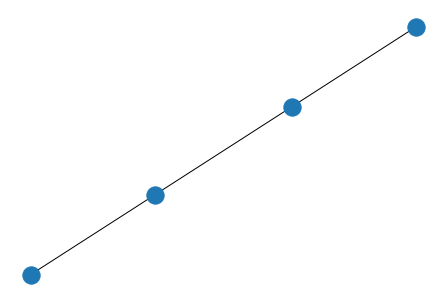

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.path_graph(4)
nx.draw(G)
plt.show()

First, let's construct a quantum register and define a circuit with four qubits.

In [ ]:
qr = QuantumRegister(4)
graph_circ = QuantumCircuit(qr)

Next, let's build a simple function that prepares each qubit in a superposition state

\begin{align}
H|0\rangle = |+\rangle = \frac{(|0\rangle + |1\rangle)}{\sqrt{2}}.
\end{align}

In [ ]:
def prepare_state(circ, n):
    for j in range(n):
        circ.h(j)

Now, let's apply this to our circuit and draw the circuit.

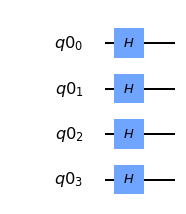

In [ ]:
prepare_state(graph_circ, 4)
graph_circ.draw(output='mpl')

Next, we need to apply controlled-$Z$ gates to each pair of qubits connected by an edge in the graph. We can construct a simple function to do this for this graph.

In [ ]:
def path_connect(circ, n):
    for j in range(n-1):
        graph_circ.cz(j,j+1)

Apply this to our circuit and drawing the circuit.

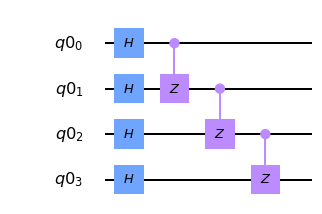

In [ ]:
path_connect(graph_circ, 4)
graph_circ.draw(output='mpl')

### Exercises

1. Use the above functions `prepare_state()` and `path_connect()` to create a Path graph state $|P_3\rangle$ for a three qubit system.
2. Create a backend on the `statevector_simulator` in QISKit and print the state vector that results from this circuit.
3. Verify that this state is a $+1$-eigenvalue eigenvector of the operators $S_v$.

### Arbitrary Graph State

In this section, we would like to write a Python function that creates arbitrary graph states given some graph $G$ defined in NetworkX. Let's define that function now.

In [ ]:
def graph_state(G):
    # Create a quantum register based on the number of nodes in G
    qr = QuantumRegister(len(G.nodes))
    # Create a circuit using the quantum register
    circ = QuantumCircuit(qr)
    # For each vertex, apply a Hadamard gate
    for vertex in G.nodes:
        circ.h(vertex)
    # For each edge e={x,y} apply a controlled-Z gate on its vertices
    for x,y in G.edges:
        circ.cz(x,y)
    return circ

Now, let's create a graph that is defined in NetworkX, the *barbell graph*.

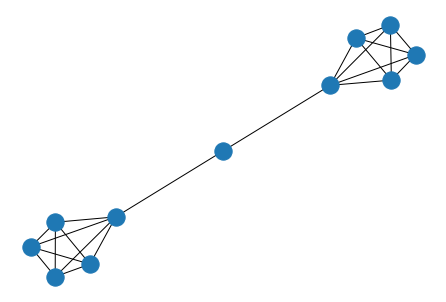

In [ ]:
G = G=nx.barbell_graph(5,1)
nx.draw(G)

Now, let's use our `graph_state()` function to create a quantum circuit that represents that graph state!

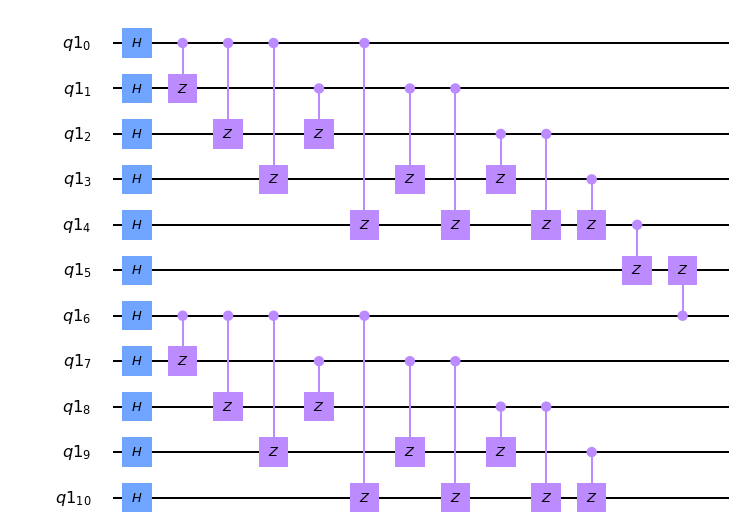

In [ ]:
circ = graph_state(G)
circ.draw(output='mpl')

This circuit is easy to verify by looking at it. Notice how the sixth qubit has two controlled-$Z$ gates connecting to the qubit above and below it in the circuit. This is the central vertex in the barbell graph. To check and make sure our `graph_state()` function is working, let's run it on the $P_4$ graph and see if we get the same thing as before.

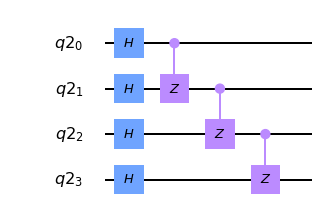

In [ ]:
G2 = nx.path_graph(4)
circ2 = graph_state(G2)
circ2.draw(output = 'mpl')

Looks like we got the same circuit! Let's construct a graph state for another graph, $K_5$. This graph is fully connected, meaning it has an edge connecting every pair of vertices.

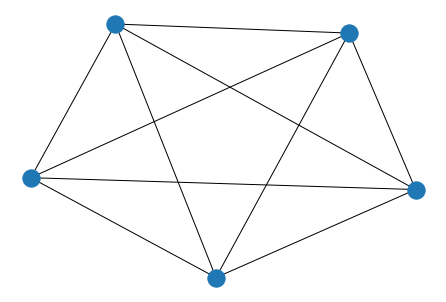

In [ ]:
K_5 = nx.complete_graph(5)
nx.draw(K_5)

If we create a graph state circuit from this graph, you will notice, there is a controlled-$Z$ gate connecting every pair of vertices.

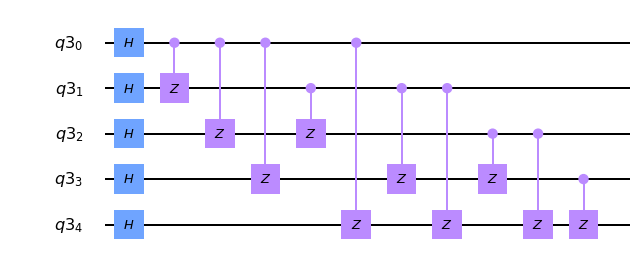

In [ ]:
circ_K_5 = graph_state(K_5)
circ_K_5.draw(output = 'mpl')

Now, let's create a graph state for the **Peterson graph**. In **The Art of Computer Programming** (*volume 4, pre-fascicle 0A. A draft of section 7: Introduction to combinatorial searching*), Donald Knuth, the creator of the famous mathematical Typesetting language LaTeX, states that the Peterson Graphs is,

>"a remarkable configuration that serves as a counterexample to many optimistic predictions about what might be true for graphs in general."

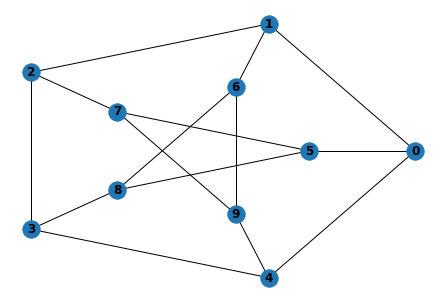

In [ ]:
G3 = nx.petersen_graph()
nx.draw_shell(G3, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

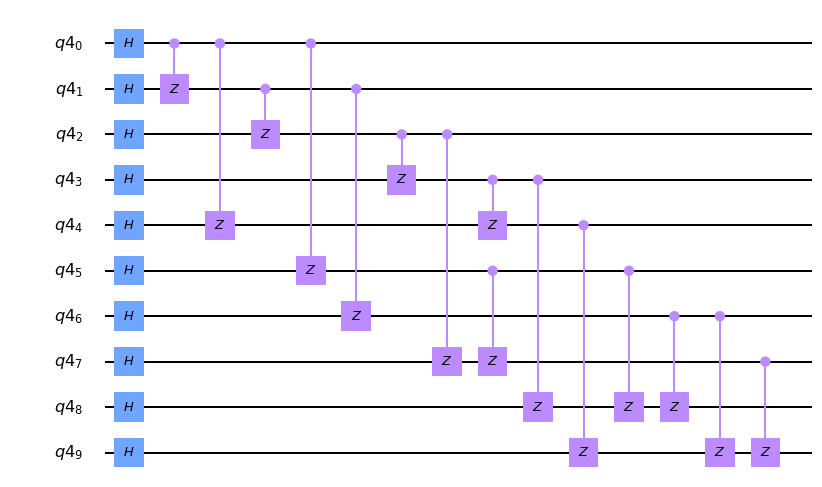

In [ ]:
circ3 = graph_state(G3)
circ3.draw(output = 'mpl')

As an illustration of the entanglement properties exhibited by graph states, let's look at a simpler version of the barbell graph state. We will have three nodes on each end with a single node connecting them in the middle.

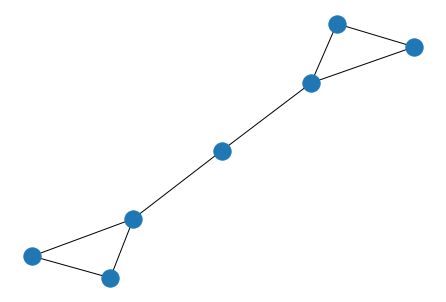

In [ ]:
BB = nx.barbell_graph(3,1)
nx.draw(BB)

What we would like to do next is construct a function that creates an arbitrary graph state along with a classical register matching the number of qubits (which is the number of nodes in the graph).

In [ ]:
def graph_state_measure(G):
    # Create a quantum register based on the number of nodes in G
    qr = QuantumRegister(len(G.nodes))
    cr = ClassicalRegister(len(G.nodes))
    # Create a circuit using the quantum register
    circ = QuantumCircuit(qr, cr)
    # For each vertex, apply a Hadamard gate
    for vertex in G.nodes:
        circ.h(vertex)
    # For each edge e={x,y} apply a controlled-Z gate on its vertices
    for x,y in G.edges:
        circ.cz(x,y)
    return circ

Now that we have constructed this function, let's create the graph state circuit along with the classical register to store measurements in.

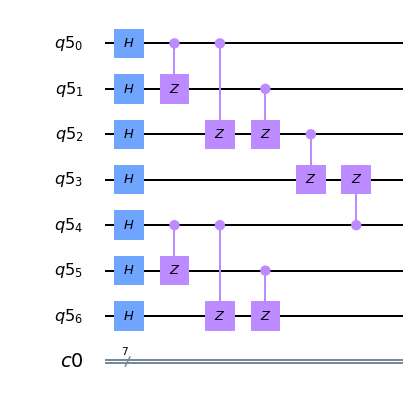

In [ ]:
BBqc = graph_state_measure(BB)
BBqc.draw(output = 'mpl')

Now, we want to measure the middle qubit that connects the two ends of the barbell. Doin this will effective cut the edges attached to this middle vertex, leaving two entangled clusters of qubits corresponding to the ends of the barbell.

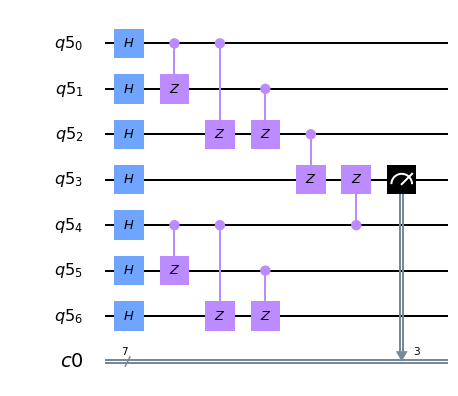

In [ ]:
BBqc.measure(3, 3)
BBqc.draw(output='mpl')

Let's define a `statevector_simulator` backend device and plot the Bloch multi-vector on the Bloch spheres for the qubits. You will notice that only the central qubit corresponding to this middle vertex has an output. The other Bloch spheres correspond to entangled qubits that are still in superposition and that we don't know. This is an excellent illustration of how selectively measuring qubits can preserve entanglement among other groups of qubits without destroying all of the entanglement. Choosing the right measurement to perform in the right basis can partially preserve entanglement and superposition in this way. This is one of the underlying fundamental concepts in error correction and will be important in later chapters. One can interpret this as cutting the edges in the graph that are attached to the qubit we have measured.

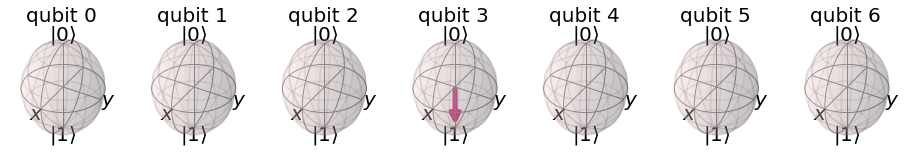

In [ ]:
from qiskit.visualization import plot_bloch_multivector
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')
# Do the simulation, returning the state vector
out_state = execute(BBqc,backend).result().get_statevector()
# Display the output state vector
plot_bloch_multivector(out_state)

Before ending this section with some exercises, there is one important thing to remark on that we will revisit in our chapter on error correction. Graphs states are incredibly useful for certain kinds of quantum error correction, which protects against noise and imperfect gate operations. An interesting fact not generally known to many is that *any graph* can *always* be embedded uniquely into a two dimensional minimal genus Riemann surface. If you are not familiar with Riemann surfaces that's okay, but the important point to make is, this provides a direct connection with something called **Quantum Surface Codes** as well as *number theory* and the theory of *dessins d'enfants* and the *Generalized Riemann Hypothesis*. We won't get into the details of the connection to surface codes here, but we will discuss them when we discuss error correction and stabilizer codes.

Suffice it to say, these are some of the deepest and most important concepts in mathematics and quantum computing and they lie at the very edge of research on error correction, materials science, and building robust quantum computers. The graph structure, or more precisely, the topological structure of surface codes makes them particularly robust against errors. Examples of quantum computation using surface codes and graph states can be found in nature in structures like [DNA](https://science.sciencemag.org/content/355/6328/950.full) and [microtubules in the brain](https://www.sciencedaily.com/releases/2014/01/140116085105.htm). DNA is being [considered as a data storage](https://www.wired.com/2017/03/quantum-computers-used-hard-drives-made-dna/) device for quantum computers, along with [single atoms by IBM researchers](https://www.nature.com/news/magnetic-hard-drives-go-atomic-1.21599). These topological structures provide protection against errors to the point that quantum phenomena and computation can be observed on macroscopic scales and at room temperature! This flies in the face of tradition doctrine that says room temperature macroscopic quantum phenomena do not exist. [Quantum computation in the brain](https://www.quantumconsciousness.org/sites/default/files/Quantum%20computation%20in%20brain%20microtubules%20-%20Hameroff.pdf) is a fascinating concept that aims to explain the nature and function of conciousness. For some ideas on how computers will evolve in the future using optics, DNA computation, and quantum computing see [here](https://computer.howstuffworks.com/computer-evolution1.htm).

### Exercises

1. Use the `graph_state()` function we constructed to create a graph state for a six qubit path graph $P_6$.
2. Define the graph $K_6$, the complete graph on sixe vertices and draw it using NetworkX.
3. Use the `graph_state()` function to create a graph state circuit for $K_6$.
4. Verify that there is a controlled-$Z$ gate connecting every pair of qubits in the circuit.
5. Repeat (2)-(4) for $K_3$.
6. Use the `statevector_simulator` in QISKit to print out the state vector of this circuit. It should be $8$-dimensional.
7. Verify in Python that this is a $+1$-eigenvalue eigenvector of the operator $Z \otimes X \otimes Z$.
8. What are the other two operators for which this is a $+1$-eigenvalue eigenvector?